In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd


df = pd.read_csv("Variables_entrevista.csv")
df.head()

,ID_Credito,Modelo,Monto_prestamo,EntidadFederativa,ActividadEconomica,FLG_Empleo,IngresoMensual,Propiedad_Casa,Default_Crediticio
0,2305109,MARCH,159003.0,JALISCO,TAXISTA,0,0.0,NaN,1
1,2306039,SENTRA,275400.0,JALISCO,TAXISTA,0,0.0,NaN,1
2,2310004,MARCH,196001.0,JALISCO,TAXISTA,0,0.0,NaN,1
3,2323061,MARCH,162802.0,SINALOA,TAXISTA,0,0.0,NaN,1
4,2340054,NP300,278300.0,SINALOA,TAXISTA,0,0.0,NaN,1


In [2]:
df.shape

(13960, 9)

In [3]:
X = df.iloc[:, [2, 5, 6]] # predecir (Monto_prestamo, FLG_Empleo, IngresoMensual)
Y = df.iloc[:,-1]

In [4]:
X.head()


,Monto_prestamo,FLG_Empleo,IngresoMensual
0,159003.0,0,0.0
1,275400.0,0,0.0
2,196001.0,0,0.0
3,162802.0,0,0.0
4,278300.0,0,0.0


### Training set & test set

In [5]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0) # 25% de test

In [6]:
print(f"Training data shape: {X_Train.shape}")
print(f"Test data shape: {X_Test.shape}")

Training data shape: (10470, 3)
Test data shape: (3490, 3)


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [8]:
from sklearn.svm import SVC
classfier = SVC(kernel='linear', random_state=0)
classfier.fit(X_Train, Y_Train)

# Predicción
Y_pred = classfier.predict(X_Test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn import metrics
print("Precisión con kernel lineal")
print(metrics.accuracy_score(Y_Test, Y_pred))
# 0.8638968481375359 -> 86.38% de presición

Precisión con kernel lineal
0.8638968481375359


In [10]:
from sklearn.svm import SVC
classfier = SVC(kernel='rbf', gamma=5, C=10, random_state=0)
classfier.fit(X_Train, Y_Train)

Y_pred = classfier.predict(X_Test)

print("Precisión con kernel RBF")
print(metrics.accuracy_score(Y_Test, Y_pred))

# 0.8636103151862464 -> 86.36% de presición

Precisión con kernel RBF
0.8638968481375359


In [11]:
svc = SVC(kernel='poly', degree=4)
svc.fit(X_Train, Y_Train)

Y_pred =svc.predict(X_Test)

print("Precisión con kernel Poly y grado")
print(metrics.accuracy_score(Y_Test, Y_pred))

# 0.8638968481375359 -> 86.38% de presición

Precisión con kernel Poly y grado
0.8638968481375359


In [12]:
print(X_Train[:,0])
print( X_Train[:, 1])

[-0.75439229  2.92446218 -0.13502605 ... -0.69066681 -0.75439229
  2.88982124]
[0. 0. 0. ... 0. 0. 0.]


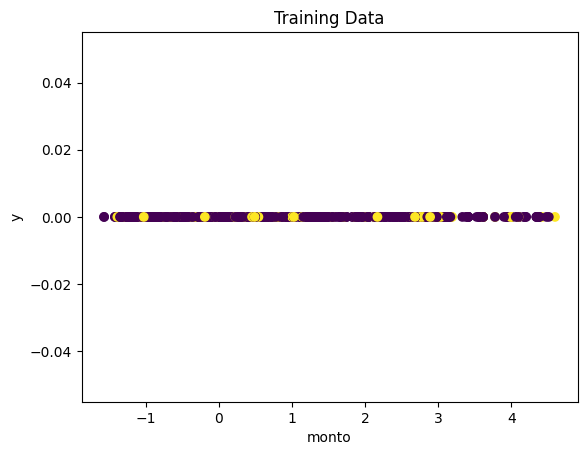

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_Train[:,0], X_Train[:, 1], c=Y_Train)
plt.xlabel('monto')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

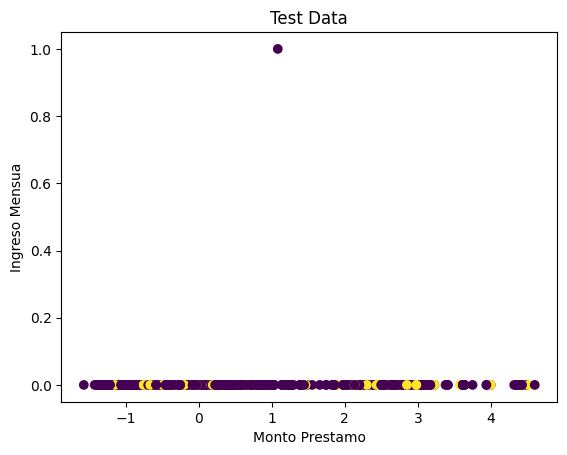

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_Test[:,0], X_Test[:, 1], c=Y_Test)
plt.xlabel('Monto Prestamo')
plt.ylabel('Ingreso Mensua')
plt.title('Test Data')
plt.show()